In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv('../data/potato_prices_pvp.csv')

df['Year'] = df['Period'].str.extract(r'(\d{4})').astype(int)

df['Average Price (€/ton)'] = df['Price (€ / kg)'] * 1000

yearly_avg = df.groupby('Year')['Average Price (€/ton)'].mean().round(1).reset_index()

yearly_avg.to_csv("../data/pt_prices.csv", index = False)



In [4]:
df = pd.read_csv('../data/potatoPricesEU.csv')

columns_to_drop = ['STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME', 'freq', 'Time frequency', 'Currency', 'currency', 'prod_veg', 'geo',"Observation value","OBS_FLAG","Observation status (Flag) V2 structure","CONF_STATUS","Confidentiality status (flag)", 'Vegetable product']
df = df.drop(columns=columns_to_drop)
df.rename(columns={'OBS_VALUE': 'Prices per 100 kg'}, inplace=True)
df.to_csv('../data/euPrices.csv', index = False)

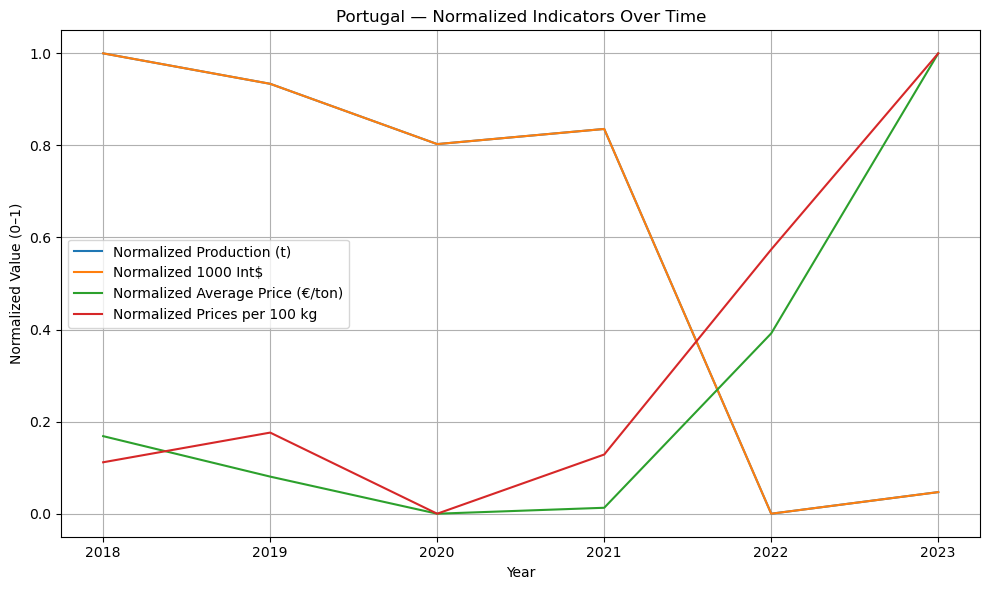

In [6]:
# Load your datasets
df = pd.read_csv("../data/joined_output.csv")
dfEU = pd.read_csv('../data/euPrices.csv')

country = "Portugal"

# Filter main dataset
df = df[(df['Area'] == country) & (df['Year'] >= 2018) & (df['Year'] <= 2023)]
df = df.sort_values('Year')

# Filter EU prices
dfEU = dfEU[dfEU['Geopolitical entity (reporting)'] == country]
dfEU = dfEU[dfEU['TIME_PERIOD'] >= 2018]

# Normalize the relevant columns
columns_to_plot = ['Production (t)', '1000 Int$']
scaler = MinMaxScaler()

# Normalize your main df
df_norm = df.copy()
df_norm[columns_to_plot] = scaler.fit_transform(df[columns_to_plot])

# Normalize yearly_avg price
yearly_avg = yearly_avg[yearly_avg["Year"] <= 2023]
yearly_avg = yearly_avg[yearly_avg["Year"] >= 2018]
yearly_avg_norm = yearly_avg.copy()
yearly_avg_norm["Normalized Price"] = scaler.fit_transform(yearly_avg[["Average Price (€/ton)"]])

# Normalize EU prices
dfEU = dfEU[dfEU["TIME_PERIOD"] <= 2023]
dfEU_norm = dfEU.copy()
dfEU_norm["Normalized EU Price"] = scaler.fit_transform(dfEU[["Prices per 100 kg"]])

# Plotting
plt.figure(figsize=(10, 6))

for col in columns_to_plot:
    plt.plot(df_norm['Year'], df_norm[col], label=f"Normalized {col}")

plt.plot(yearly_avg_norm["Year"], yearly_avg_norm["Normalized Price"], label="Normalized Average Price (€/ton)")
plt.plot(dfEU_norm["TIME_PERIOD"], dfEU_norm["Normalized EU Price"], label="Normalized Prices per 100 kg")

plt.title(f"{country} — Normalized Indicators Over Time")
plt.xlabel("Year")
plt.ylabel("Normalized Value (0–1)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()